In [12]:
import pyaerocom as pya
import matplotlib.pyplot as plt
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
pya.change_verbosity('critical', log=pya.const.print_log) # don't output warnings


import seaborn as sns
# Use seaborn style defaults and set the default figure size
#sns.set(rc={'figure.figsize':(11, 4)})


In [13]:
pya.__version__

'0.8.1.dev1'

In [3]:
pya.const.BASEDIR = './shared-ns1000k/inputs/pyaerocom-testdata'

Initiating directories for pyaerocom test dataset


In [4]:
pya.const.BASEDIR

'./shared-ns1000k/inputs/pyaerocom-testdata'

In [5]:
obs_reader = pya.io.ReadUngridded('AeronetSDAV3Lev2.daily')
print(obs_reader)


Dataset name: AeronetSDAV3Lev2.daily
Data directory: ./shared-ns1000k/inputs/pyaerocom-testdata/obsdata/Aeronet.SDA.V3L2.0.daily/renamed
Supported variables: ['od500gt1aer', 'od500lt1aer', 'od500aer', 'ang4487aer', 'od550aer', 'od550gt1aer', 'od550lt1aer']
Last revision: 20190920


In [32]:
obs_data = obs_reader.read(vars_to_retrieve='od550aer')
obs_data #displays data type

UngriddedData <networks: ['AeronetSDAV3Lev2.daily']; vars: ['od550aer']; instruments: ['sun_photometer'];No. of stations: 1227

In [22]:
DATA_ID = 'TM5_AP3-CTRL2019'

In [23]:
_model_data = pya.io.ReadGridded(DATA_ID)

In [24]:
model_data =  _model_data.read_var('od550aer', start=2010)
display(model_data)

pyaerocom.GriddedData
Grid data: <iris 'Cube' of atmosphere_optical_thickness_due_to_ambient_aerosol / (1) (time: 12; latitude: 90; longitude: 120)>

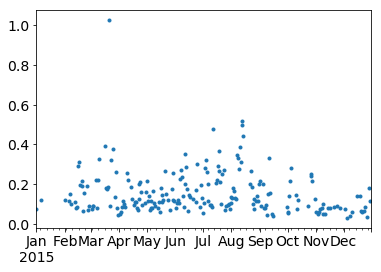

In [27]:
# Example accessing data
axes = obs_data['Leipzig']['od550aer']['2015':'2015']
axes.plot(style='.')

In [28]:
col_data = pya.colocation.colocate_gridded_ungridded(model_data, 
                                                     obs_data, 
                                                     ts_type='monthly',
                                                     start=2010)

TypeError: Cannot determine whether a point lies within a bounded region for datetime-like objects.